In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import pickle
import cv2
from sklearn.preprocessing import StandardScaler

In [2]:
from importlib import reload
from sln import utils; reload(utils)
from sln import train; reload(train)
from sln import search; reload(search)

<module 'sln.search' from 'D:\\side\\CarND-Vehicle-Detection\\sln\\search.py'>

In [3]:
svc_pickle = pickle.load( open("svc.p", "rb" ))
svc = svc_pickle['svc']
scaler = svc_pickle['scaler']

In [4]:
img = mpimg.imread('test_images/test5.jpg')

In [5]:
ystart = 400
ystop = 656
orient = 9
pix_per_cell = 8
cell_per_block = 2
scale = 1.6

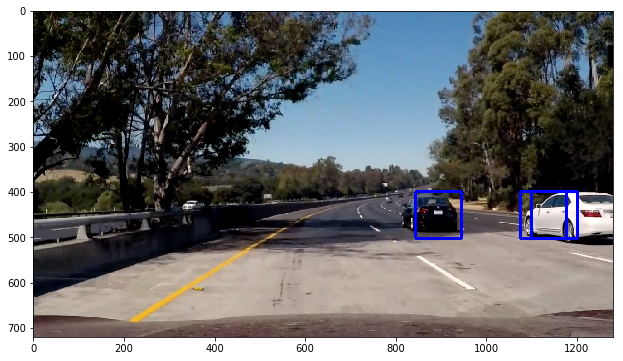

In [6]:
bboxes = search.find_cars(img, svc, scaler, 
                          ystart, ystop, orient, pix_per_cell, cell_per_block, scale)
draw_img = search.draw_bboxes(img, bboxes)
plt.figure(figsize=(20,6))
plt.imshow(draw_img)

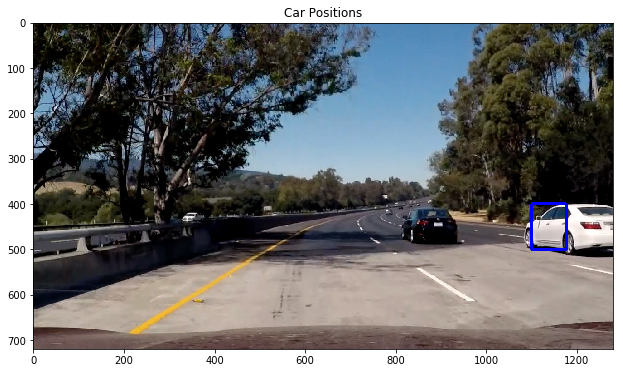

In [29]:
draw_img = search.draw_result(img, bboxes, 1)
plt.figure(figsize=(20,6))
plt.imshow(draw_img)
plt.title('Car Positions')


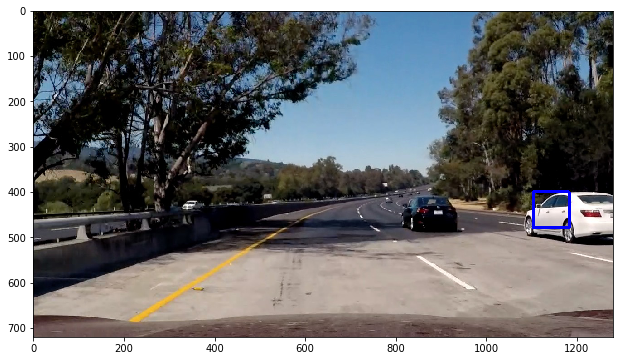

In [8]:
tracker = search.Tracker(svc, scaler)
out_img = tracker.process(img)
plt.figure(figsize=(20,6))
plt.imshow(out_img)

In [32]:
from importlib import reload
from sln import utils; reload(utils)
from sln import train; reload(train)
from sln import search; reload(search)

<module 'sln.search' from 'D:\\side\\CarND-Vehicle-Detection\\sln\\search.py'>

In [36]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

output = 'output_video.mp4'
project_clip = VideoFileClip("project_video.mp4")
tracker = search.Tracker(svc, scaler)
output_clip = project_clip.fl_image(tracker.process)
output_clip.write_videofile(output, audio=False)

[MoviePy] >>>> Building video output_video.mp4
[MoviePy] Writing video output_video.mp4


100%|█████████████████████████████████████▉| 1260/1261 [31:23<00:01,  1.47s/it]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video.mp4 

